# FOCI-OpenIFS with VIKING10 nest

Analyse common diagnostics and biases

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cmocean 

In [2]:
# Read grid
grid = '/sfs/fs1/work-geomar/smomw352/foci_analysis/grids_areas_masks.nc'
ds_grid = xr.open_dataset(grid)
orca05_x   = ds_grid['opat.lon'].shape[1]
orca05_y   = ds_grid['opat.lon'].shape[0]

orca05_lon = xr.DataArray(ds_grid['opat.lon'], dims=("y", "x"), coords={"x": np.arange(0,orca05_x), "y": np.arange(0,orca05_y)})
orca05_lat = xr.DataArray(ds_grid['opat.lat'], dims=("y", "x"), coords={"x": np.arange(0,orca05_x), "y": np.arange(0,orca05_y)})
orca05_area = xr.DataArray(ds_grid['opat.srf'], dims=("y", "x"), coords={"x": np.arange(0,orca05_x), "y": np.arange(0,orca05_y)})
orca05_mask = xr.DataArray(ds_grid['opat.srf'], dims=("y", "x"), coords={"x": np.arange(0,orca05_x), "y": np.arange(0,orca05_y)})

## SST mean and biases

/sfs/fs6/home-geomar/smomw352/miniconda3/envs/py3_std/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw352/miniconda3/envs/py3_std/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw352/miniconda3/envs/py3_std/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw352/miniconda3/envs/py3_std/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw352/miniconda3/envs/py3_std/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw352/miniconda3

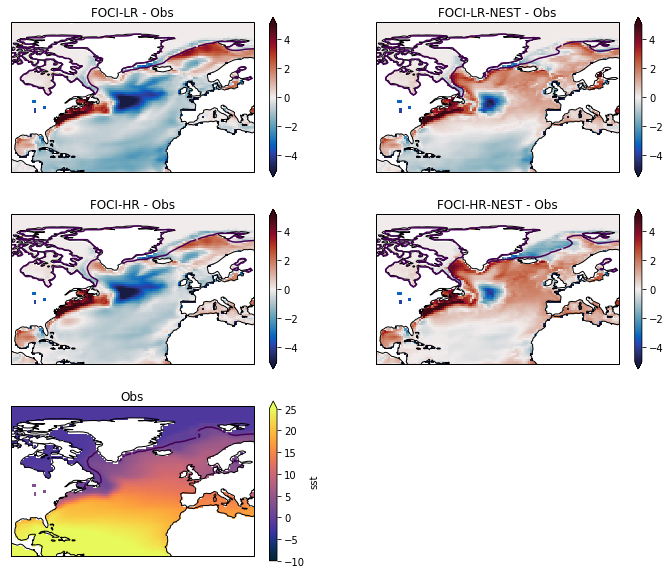

In [49]:
# HadSST and ice
hadisst = '/sfs/fs1/work-geomar/smomw352/obs/HadISST_sst_r360x180.nc'
hadiice = '/sfs/fs1/work-geomar/smomw352/obs/HadISST_ice_r360x180.nc'

ds_hadsst = xr.open_dataset(hadisst)
ds_hadice = xr.open_dataset(hadiice)

sst_had = ds_hadsst['sst'].where(ds_hadsst['sst'] > -50)
sst_had = sst_had.sel(time=slice('1950-01-01','2000-01-01')).groupby('time.season').mean('time')
sic_had = ds_hadice['sic'].sel(time=slice('1950-01-01','2000-01-01')).groupby('time.season').mean('time')

# FOCI-LR
foci_lr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK001_pmpi_1m_19500101_19791231_grid_T_yseasmean_r360x180.nc'
ds_foci_lr = xr.open_dataset(foci_lr)
sst_foci_lr = ds_foci_lr['sosstsst'].groupby('time_counter.season').mean('time_counter')
foci_lr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK001_pmpi_1m_19500101_19791231_icemod_yseasmean_r360x180.nc'
ds_foci_lr = xr.open_dataset(foci_lr)
sic_foci_lr = ds_foci_lr['ileadfra'].groupby('time_counter.season').mean('time_counter')

# FOCI-LR-NEST
foci_lr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK002_29_1m_19500101_19791231_grid_T_yseasmean_r360x180.nc'
ds_foci_lr_nest = xr.open_dataset(foci_lr_nest)
sst_foci_lr_nest = ds_foci_lr_nest['sosstsst'].groupby('time_counter.season').mean('time_counter')
foci_lr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK002_29_1m_19500101_19791231_icemod_yseasmean_r360x180.nc'
ds_foci_lr_nest = xr.open_dataset(foci_lr_nest)
sic_foci_lr_nest = ds_foci_lr_nest['ileadfra'].groupby('time_counter.season').mean('time_counter')

# FOCI-HR-NEST
foci_hr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK005_6_1m_19500101_19791231_grid_T_yseasmean_r360x180.nc'
ds_foci_hr_nest = xr.open_dataset(foci_hr_nest)
sst_foci_hr_nest = ds_foci_hr_nest['sosstsst'].groupby('time_counter.season').mean('time_counter')
foci_hr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK005_6_1m_19500101_19791231_icemod_yseasmean_r360x180.nc'
ds_foci_hr_nest = xr.open_dataset(foci_hr_nest)
sic_foci_hr_nest = ds_foci_hr_nest['ileadfra'].groupby('time_counter.season').mean('time_counter')

# FOCI-HR
foci_hr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK006_3_1m_19500101_19791231_grid_T_yseasmean_r360x180.nc'
ds_foci_hr = xr.open_dataset(foci_hr)
sst_foci_hr = ds_foci_hr['sosstsst'].groupby('time_counter.season').mean('time_counter')
foci_hr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK006_3_1m_19500101_19791231_icemod_yseasmean_r360x180.nc'
ds_foci_hr = xr.open_dataset(foci_hr)
sic_foci_hr = ds_foci_hr['ileadfra'].groupby('time_counter.season').mean('time_counter')

prj = ccrs.PlateCarree()
tmin1 = -10
tmax1 = 25
tmin2 = -5
tmax2 = 5
cmap1 = cmocean.cm.thermal
cmap2 = cmocean.cm.balance

fig = plt.figure(figsize=(12,10))
axs = []
axs.append( fig.add_subplot(3,2,1,projection=prj) )
axs.append( fig.add_subplot(3,2,2,projection=prj) )
axs.append( fig.add_subplot(3,2,3,projection=prj) )
axs.append( fig.add_subplot(3,2,4,projection=prj) )
axs.append( fig.add_subplot(3,2,5,projection=prj) )

(sst_foci_lr - sst_had).sel(season='DJF').plot(ax=axs[0],cmap=cmap2,vmin=tmin2,vmax=tmax2)
sic_foci_lr.sel(season='DJF').plot.contour(ax=axs[0],levels=np.array([0.15]))

(sst_foci_lr_nest - sst_had).sel(season='DJF').plot(ax=axs[1],cmap=cmap2,vmin=tmin2,vmax=tmax2)
sic_foci_lr_nest.sel(season='DJF').plot.contour(ax=axs[1],levels=np.array([0.15]))

(sst_foci_hr - sst_had).sel(season='DJF').plot(ax=axs[2],cmap=cmap2,vmin=tmin2,vmax=tmax2)
sic_foci_hr.sel(season='DJF').plot.contour(ax=axs[2],levels=np.array([0.15]))

(sst_foci_hr_nest - sst_had).sel(season='DJF').plot(ax=axs[3],cmap=cmap2,vmin=tmin2,vmax=tmax2)
sic_foci_hr_nest.sel(season='DJF').plot.contour(ax=axs[3],levels=np.array([0.15]))

axs[0].set_title('FOCI-LR - Obs')
axs[1].set_title('FOCI-LR-NEST - Obs')
axs[2].set_title('FOCI-HR - Obs')
axs[3].set_title('FOCI-HR-NEST - Obs')

sst_had.sel(season='DJF').plot(ax=axs[4],cmap=cmap1,vmin=tmin1,vmax=tmax1)
sic_had.sel(season='DJF').plot.contour(ax=axs[4],levels=np.array([0.15]))
axs[4].set_title('Obs')

for ax in axs:
    ax.coastlines()
    ax.set_extent([-100,30,10,90],crs=prj)

fig.savefig('sst_biases.png',format='png',dpi=600)
#fig.tight_layout()

## Sea-ice area

/sfs/fs6/home-geomar/smomw352/miniconda3/envs/py3_std/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw352/miniconda3/envs/py3_std/lib/python3.7/site-packages/xarray/core/common.py:664: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims
/sfs/fs6/home-geomar/smomw352/miniconda3/envs/py3_std/lib/python3.7/site-packages/xarray/core/common.py:664: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims
/sfs/fs6/home-geomar/smomw352/miniconda3/envs/py3_std/lib/

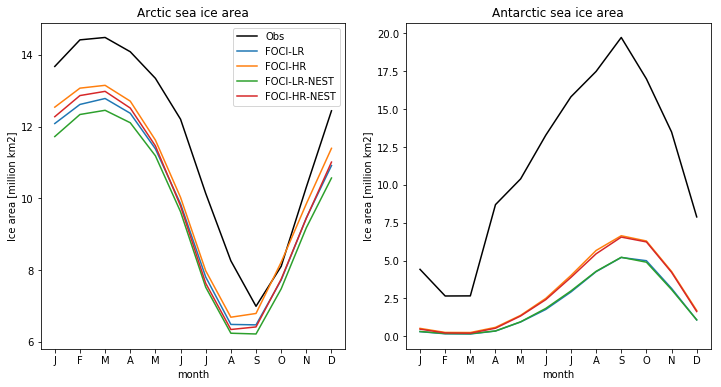

In [48]:
# Sea-ice area
scale = 1e-12 # m2 -> 1e6 km2

# HadSST ice
hadiice = '/sfs/fs1/work-geomar/smomw352/obs/HadISST_ice.nc'
ds_hadice = xr.open_dataset(hadiice)
sic_had = ds_hadice['sic'].sel(time=slice('1850-01-01','1900-01-01')).groupby('time.month').mean('time')
radius = 6371 * 1e3 # earth radius
had_area = (radius * 1./180. * np.pi)**2 * np.cos(ds_hadice['latitude'] / 180. * np.pi) 
sia_nh_had = (sic_had.where(ds_hadice['latitude'] > 0.) * had_area).sum('latitude').sum('longitude') * scale
sia_sh_had = (sic_had.where(ds_hadice['latitude'] < 0.) * had_area).sum('latitude').sum('longitude') * scale

# FOCI-LR
foci_lr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK001_pmpi_1m_19500101_19791231_icemod_ymonmean.nc'
ds_foci_lr = xr.open_dataset(foci_lr)
sic_foci_lr = ds_foci_lr['ileadfra'].groupby('time_counter.month').mean('time_counter')
sia_nh_foci_lr = (sic_foci_lr.where(orca05_lat > 0.) * orca05_area).sum('y').sum('x') * scale
sia_sh_foci_lr = (sic_foci_lr.where(orca05_lat < 0.) * orca05_area).sum('y').sum('x') * scale

# FOCI-LR-NEST
foci_lr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK002_29_1m_19500101_19791231_icemod_ymonmean.nc'
ds_foci_lr_nest = xr.open_dataset(foci_lr_nest)
sic_foci_lr_nest = ds_foci_lr_nest['ileadfra'].groupby('time_counter.month').mean('time_counter')
sia_nh_foci_lr_nest = (sic_foci_lr_nest.where(orca05_lat > 0.) * orca05_area).sum('y').sum('x') * scale
sia_sh_foci_lr_nest = (sic_foci_lr_nest.where(orca05_lat < 0.) * orca05_area).sum('y').sum('x') * scale

# FOCI-HR-NEST
foci_hr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK005_6_1m_19500101_19791231_icemod_ymonmean.nc'
ds_foci_hr_nest = xr.open_dataset(foci_hr_nest)
sic_foci_hr_nest = ds_foci_hr_nest['ileadfra'].groupby('time_counter.month').mean('time_counter')
sia_nh_foci_hr_nest = (sic_foci_hr_nest.where(orca05_lat > 0.) * orca05_area).sum('y').sum('x') * scale
sia_sh_foci_hr_nest = (sic_foci_hr_nest.where(orca05_lat < 0.) * orca05_area).sum('y').sum('x') * scale

# FOCI-HR
foci_hr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK006_3_1m_19500101_19791231_icemod_ymonmean.nc'
ds_foci_hr = xr.open_dataset(foci_hr)
sic_foci_hr = ds_foci_hr['ileadfra'].groupby('time_counter.month').mean('time_counter') 
sia_nh_foci_hr = (sic_foci_hr.where(orca05_lat > 0.) * orca05_area).sum('y').sum('x') * scale
sia_sh_foci_hr = (sic_foci_hr.where(orca05_lat < 0.) * orca05_area).sum('y').sum('x') * scale

# Plot
fig, ax = plt.subplots(1,2,figsize=(12,6))
sia_nh_had.plot(ax=ax[0],label='Obs',color='k')
sia_nh_foci_lr.plot(ax=ax[0],label='FOCI-LR')
sia_nh_foci_hr.plot(ax=ax[0],label='FOCI-HR')
sia_nh_foci_lr_nest.plot(ax=ax[0],label='FOCI-LR-NEST')
sia_nh_foci_hr_nest.plot(ax=ax[0],label='FOCI-HR-NEST')

sia_sh_had.plot(ax=ax[1],label='Obs',color='k')
sia_sh_foci_lr.plot(ax=ax[1],label='FOCI-LR')
sia_sh_foci_hr.plot(ax=ax[1],label='FOCI-HR')
sia_sh_foci_lr_nest.plot(ax=ax[1],label='FOCI-LR-NEST')
sia_sh_foci_hr_nest.plot(ax=ax[1],label='FOCI-HR-NEST')

ax[0].set_title('Arctic sea ice area')
ax[1].set_title('Antarctic sea ice area')
for a in ax:
    a.set_ylabel('Ice area [million km2]')
    a.set_xticks(np.arange(1,13))
    a.set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])
ax[0].legend()
fig.savefig('sea-ice_area.png',format='png',dpi=600)

## Sea-surface height

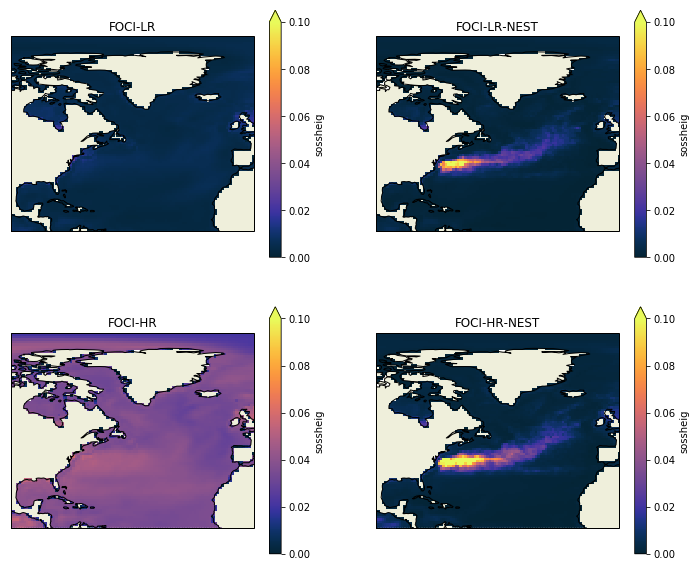

In [58]:
## SSH variance (from 5d data on ORCA05 grid)

# FOCI-LR
foci_lr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK001_pmpi_5d_19500101_19791231_grid_T_yseasvar_r360x180.nc'
ds_foci_lr = xr.open_dataset(foci_lr)
ssh_foci_lr = ds_foci_lr['sossheig'].groupby('time_counter.season').mean('time_counter')
ssh_foci_lr = ssh_foci_lr.where(ssh_foci_lr > 0)

# FOCI-LR-NEST
foci_lr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK002_29_5d_19500101_19791231_grid_T_yseasvar_r360x180.nc'
ds_foci_lr_nest = xr.open_dataset(foci_lr_nest)
ssh_foci_lr_nest = ds_foci_lr_nest['sossheig'].groupby('time_counter.season').mean('time_counter')
ssh_foci_lr_nest = ssh_foci_lr_nest.where(ssh_foci_lr_nest > 0)

# FOCI-HR-NEST
foci_hr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK005_6_5d_19500101_19791231_grid_T_yseasvar_r360x180.nc'
ds_foci_hr_nest = xr.open_dataset(foci_hr_nest)
ssh_foci_hr_nest = ds_foci_hr_nest['sossheig'].groupby('time_counter.season').mean('time_counter')
ssh_foci_hr_nest = ssh_foci_hr_nest.where(ssh_foci_hr_nest > 0)

# FOCI-HR
foci_hr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK006_3_5d_19500101_19791231_grid_T_yseasvar_r360x180.nc'
ds_foci_hr = xr.open_dataset(foci_hr)
ssh_foci_hr = ds_foci_hr['sossheig'].groupby('time_counter.season').mean('time_counter')
ssh_foci_hr = ssh_foci_hr.where(ssh_foci_hr > 0)

prj = ccrs.PlateCarree()
smin1 = 0
smax1 = 0.1
cmap1 = cmocean.cm.thermal

fig = plt.figure(figsize=(12,10))
axs = []
axs.append( fig.add_subplot(2,2,1,projection=prj) )
axs.append( fig.add_subplot(2,2,2,projection=prj) )
axs.append( fig.add_subplot(2,2,3,projection=prj) )
axs.append( fig.add_subplot(2,2,4,projection=prj) )

ssh_foci_lr.sel(season='DJF').plot(ax=axs[0],cmap=cmap1,vmin=smin1,vmax=smax1)

ssh_foci_lr_nest.sel(season='DJF').plot(ax=axs[1],cmap=cmap1,vmin=smin1,vmax=smax1)

ssh_foci_hr.sel(season='DJF').plot(ax=axs[2],cmap=cmap1,vmin=smin1,vmax=smax1)

ssh_foci_hr_nest.sel(season='DJF').plot(ax=axs[3],cmap=cmap1,vmin=smin1,vmax=smax1)

axs[0].set_title('FOCI-LR')
axs[1].set_title('FOCI-LR-NEST')
axs[2].set_title('FOCI-HR')
axs[3].set_title('FOCI-HR-NEST')

for ax in axs:
    ax.coastlines()
    ax.set_extent([-100,0,10,90],crs=prj)
    ax.add_feature(cartopy.feature.LAND)

fig.savefig('ssh_variance.png',format='png',dpi=600)

## Surface kinetic energy

/sfs/fs6/home-geomar/smomw352/miniconda3/envs/py3_std/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw352/miniconda3/envs/py3_std/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw352/miniconda3/envs/py3_std/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw352/miniconda3/envs/py3_std/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


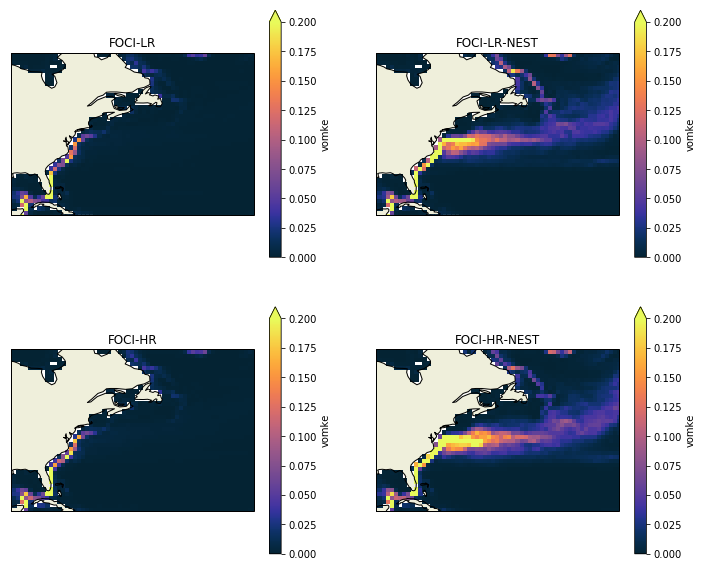

In [15]:
# FOCI-LR
foci_lr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK001_pmpi_1m_19500101_19791231_MKE_yseasmean_r360x180.nc'
ds_foci_lr = xr.open_dataset(foci_lr)
mke_foci_lr = ds_foci_lr['vomke'].groupby('time_counter.season').mean('time_counter')
mke_foci_lr = mke_foci_lr.where(mke_foci_lr > 0)

# FOCI-LR-NEST
foci_lr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK002_29_1m_19500101_19791231_MKE_yseasmean_r360x180.nc'
ds_foci_lr_nest = xr.open_dataset(foci_lr_nest)
mke_foci_lr_nest = ds_foci_lr_nest['vomke'].groupby('time_counter.season').mean('time_counter')
mke_foci_lr_nest = mke_foci_lr_nest.where(mke_foci_lr_nest > 0)

# FOCI-HR-NEST
foci_hr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK005_6_1m_19500101_19791231_MKE_yseasmean_r360x180.nc'
ds_foci_hr_nest = xr.open_dataset(foci_hr_nest)
mke_foci_hr_nest = ds_foci_hr_nest['vomke'].groupby('time_counter.season').mean('time_counter')
mke_foci_hr_nest = mke_foci_hr_nest.where(mke_foci_hr_nest > 0)

# FOCI-HR
foci_hr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK006_3_1m_19500101_19791231_MKE_yseasmean_r360x180.nc'
ds_foci_hr = xr.open_dataset(foci_hr)
mke_foci_hr = ds_foci_hr['vomke'].groupby('time_counter.season').mean('time_counter')
mke_foci_hr = mke_foci_hr.where(mke_foci_hr > 0)

prj = ccrs.PlateCarree()
smin1 = 0
smax1 = 0.2
cmap1 = cmocean.cm.thermal

fig = plt.figure(figsize=(12,10))
axs = []
axs.append( fig.add_subplot(2,2,1,projection=prj) )
axs.append( fig.add_subplot(2,2,2,projection=prj) )
axs.append( fig.add_subplot(2,2,3,projection=prj) )
axs.append( fig.add_subplot(2,2,4,projection=prj) )

mke_foci_lr.isel(deptht=0).sel(season='DJF').plot(ax=axs[0],cmap=cmap1,vmin=smin1,vmax=smax1)

mke_foci_lr_nest.isel(deptht=0).sel(season='DJF').plot(ax=axs[1],cmap=cmap1,vmin=smin1,vmax=smax1)

mke_foci_hr.isel(deptht=0).sel(season='DJF').plot(ax=axs[2],cmap=cmap1,vmin=smin1,vmax=smax1)

mke_foci_hr_nest.isel(deptht=0).sel(season='DJF').plot(ax=axs[3],cmap=cmap1,vmin=smin1,vmax=smax1)

axs[0].set_title('FOCI-LR')
axs[1].set_title('FOCI-LR-NEST')
axs[2].set_title('FOCI-HR')
axs[3].set_title('FOCI-HR-NEST')

for ax in axs:
    ax.coastlines()
    ax.set_extent([-90,-30,20,60],crs=prj)
    ax.add_feature(cartopy.feature.LAND)

fig.savefig('mke_1m.png',format='png',dpi=600)

## Jets

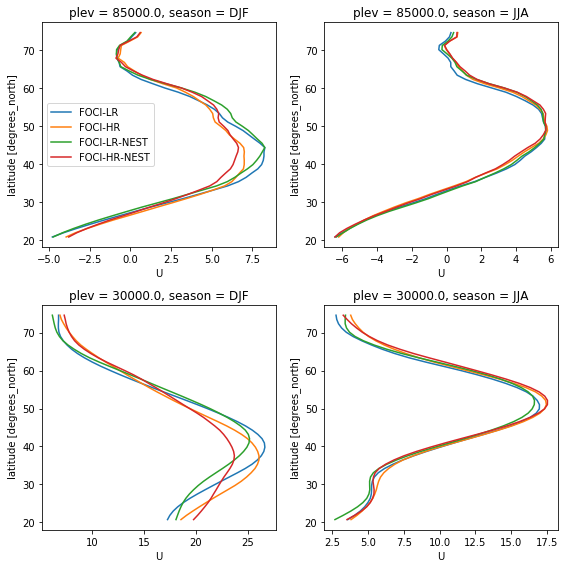

In [4]:
# FOCI-LR
foci_lr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK001_pmpi_19500101_19791231_SH_isobaricInhPa_yseasmean.nc'
ds_foci_lr = xr.open_dataset(foci_lr)
u850_foci_lr = ds_foci_lr['U'].groupby('time.season').mean('time')

# FOCI-LR-NEST
foci_lr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK002_29_19500101_19791231_SH_isobaricInhPa_yseasmean.nc'
ds_foci_lr_nest = xr.open_dataset(foci_lr_nest)
u850_foci_lr_nest = ds_foci_lr_nest['U'].groupby('time.season').mean('time')

# FOCI-HR-NEST
foci_hr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK005_6_19500101_19791231_SH_isobaricInhPa_yseasmean.nc'
ds_foci_hr_nest = xr.open_dataset(foci_hr_nest)
u850_foci_hr_nest = ds_foci_hr_nest['U'].groupby('time.season').mean('time')

# FOCI-HR
foci_hr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK006_3_19500101_19791231_SH_isobaricInhPa_yseasmean.nc'
ds_foci_hr = xr.open_dataset(foci_hr)
u850_foci_hr = ds_foci_hr['U'].groupby('time.season').mean('time')

lonmin = 300
lonmax = 360
latmin = 75
latmax = 20

fig, axes = plt.subplots(2,2,figsize=(8,8))
axs = axes.flat

plev = 85000
season = 'DJF'
u850_foci_lr.sel(plev=plev, lon=slice(280,360), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[0],label='FOCI-LR')
u850_foci_hr.sel(plev=plev, lon=slice(280,360), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[0],label='FOCI-HR')
u850_foci_lr_nest.sel(plev=plev, lon=slice(280,360), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[0],label='FOCI-LR-NEST')
u850_foci_hr_nest.sel(plev=plev, lon=slice(280,360), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[0],label='FOCI-HR-NEST')
axs[0].legend()

season = 'JJA'
u850_foci_lr.sel(plev=plev, lon=slice(280,360), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[1],label='FOCI-LR')
u850_foci_hr.sel(plev=plev, lon=slice(280,360), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[1],label='FOCI-HR')
u850_foci_lr_nest.sel(plev=plev, lon=slice(280,360), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[1],label='FOCI-LR-NEST')
u850_foci_hr_nest.sel(plev=plev, lon=slice(280,360), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[1],label='FOCI-HR-NEST')

plev = 30000
season = 'DJF'
u850_foci_lr.sel(plev=plev, lon=slice(280,360), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[2],label='FOCI-LR')
u850_foci_hr.sel(plev=plev, lon=slice(280,360), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[2],label='FOCI-HR')
u850_foci_lr_nest.sel(plev=plev, lon=slice(280,360), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[2],label='FOCI-LR-NEST')
u850_foci_hr_nest.sel(plev=plev, lon=slice(280,360), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[2],label='FOCI-HR-NEST')

season = 'JJA'
u850_foci_lr.sel(plev=plev, lon=slice(280,360), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[3],label='FOCI-LR')
u850_foci_hr.sel(plev=plev, lon=slice(280,360), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[3],label='FOCI-HR')
u850_foci_lr_nest.sel(plev=plev, lon=slice(280,360), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[3],label='FOCI-LR-NEST')
u850_foci_hr_nest.sel(plev=plev, lon=slice(280,360), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[3],label='FOCI-HR-NEST')

fig.tight_layout()
fig.savefig('')

## Vertical winds

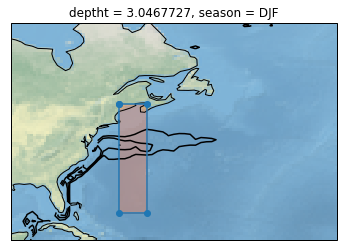

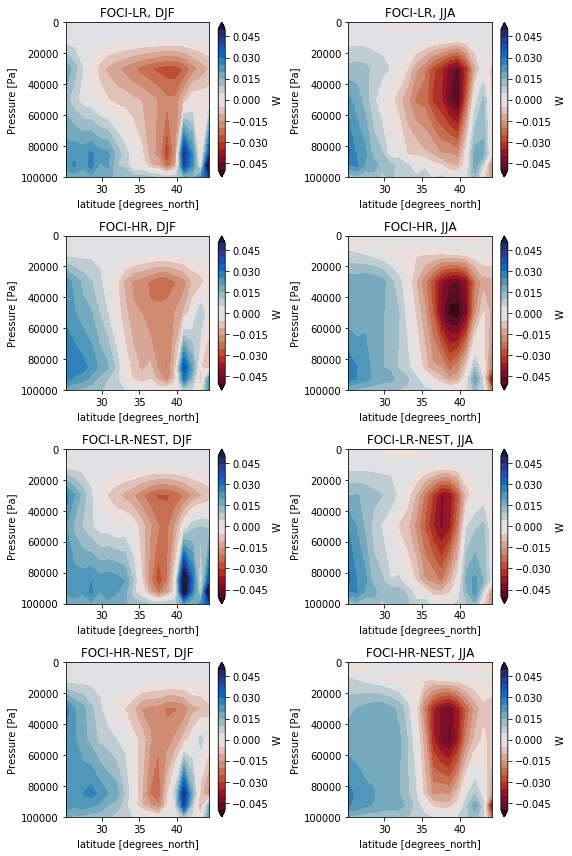

In [36]:
# FOCI-LR
foci_lr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK001_pmpi_19500101_19791231_SH_isobaricInhPa_yseasmean.nc'
ds_foci_lr = xr.open_dataset(foci_lr)
w_foci_lr = ds_foci_lr['W'].groupby('time.season').mean('time')

# FOCI-LR-NEST
foci_lr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK002_29_19500101_19791231_SH_isobaricInhPa_yseasmean.nc'
ds_foci_lr_nest = xr.open_dataset(foci_lr_nest)
w_foci_lr_nest = ds_foci_lr_nest['W'].groupby('time.season').mean('time')

# FOCI-HR-NEST
foci_hr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK005_6_19500101_19791231_SH_isobaricInhPa_yseasmean.nc'
ds_foci_hr_nest = xr.open_dataset(foci_hr_nest)
w_foci_hr_nest = ds_foci_hr_nest['W'].groupby('time.season').mean('time')

# FOCI-HR
foci_hr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK006_3_19500101_19791231_SH_isobaricInhPa_yseasmean.nc'
ds_foci_hr = xr.open_dataset(foci_hr)
w_foci_hr = ds_foci_hr['W'].groupby('time.season').mean('time')

# Focus over Gulf Stream
lonmin = 290 #290
lonmax = 295 #292
latmin = 45
latmax = 25

# Draw box on map
x, y = [lonmin, lonmin, lonmax, lonmax, lonmin], [latmin, latmax, latmax, latmin, latmin]
fig_ref = plt.figure()
ax_ref = fig_ref.add_subplot(111, projection=ccrs.PlateCarree())
ax_ref.stock_img()
ax_ref.coastlines()
ax_ref.plot(x, y, marker='o', transform=ccrs.PlateCarree())
ax_ref.fill(x, y, transform=ccrs.PlateCarree(), color='coral', alpha=0.4)
ax_ref.set_extent([-90,-30,20,60],crs=ccrs.PlateCarree())
mke_foci_hr_nest.isel(deptht=0).sel(season='DJF').plot.contour(ax=ax_ref,levels=np.linspace(0.1,0.3,3),colors='k')
fig_ref.savefig('map_gulfstream.png',format='png')

wlevels = np.linspace(-0.05,0.05,21)
cmap = cmocean.cm.balance_r

fig, axes = plt.subplots(4,2,figsize=(8,12))
axs = axes.flat

season = 'DJF'
w_foci_lr.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot.contourf(x='lat',y='plev',ax=axes[0,0],levels=wlevels,cmap=cmap,extend='both')
w_foci_hr.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot.contourf(x='lat',y='plev',ax=axes[1,0],levels=wlevels,cmap=cmap,extend='both')
w_foci_lr_nest.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot.contourf(x='lat',y='plev',ax=axes[2,0],levels=wlevels,cmap=cmap,extend='both')
w_foci_hr_nest.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot.contourf(x='lat',y='plev',ax=axes[3,0],levels=wlevels,cmap=cmap,extend='both')
axes[0,0].set_title('FOCI-LR, %s' % (season,))
axes[1,0].set_title('FOCI-HR, %s' % (season,))
axes[2,0].set_title('FOCI-LR-NEST, %s' % (season,))
axes[3,0].set_title('FOCI-HR-NEST, %s' % (season,))

season = 'JJA'
w_foci_lr.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot.contourf(x='lat',y='plev',ax=axes[0,1],levels=wlevels,cmap=cmap,extend='both')
w_foci_hr.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot.contourf(x='lat',y='plev',ax=axes[1,1],levels=wlevels,cmap=cmap,extend='both')
w_foci_lr_nest.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot.contourf(x='lat',y='plev',ax=axes[2,1],levels=wlevels,cmap=cmap,extend='both')
w_foci_hr_nest.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot.contourf(x='lat',y='plev',ax=axes[3,1],levels=wlevels,cmap=cmap,extend='both')
axes[0,1].set_title('FOCI-LR, %s' % (season,))
axes[1,1].set_title('FOCI-HR, %s' % (season,))
axes[2,1].set_title('FOCI-LR-NEST, %s' % (season,))
axes[3,1].set_title('FOCI-HR-NEST, %s' % (season,))

for ax in axs:
    ax.invert_yaxis()
    ax.set_ylabel('Pressure [Pa]')

fig.tight_layout()
fig.savefig('omega_gulfstream.png',format='png',dpi=600)

## Heat fluxes

In [21]:
# All fluxes are accumulated between output steps, i.e. 12 hr
# So we must divide by 12 * 3600 to get fluxes in e.g. W/m2 or m/s.
fscale = 1./(12*3600.) # e.g. W/m2 * s -> W/m2
pscale = 2000. # kg/m2 * s -> mm/day

# FOCI-LR
foci_lr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK001_pmpi_1m_19500101_19791231_GG_surface_yseasmean.nc'
ds_foci_lr = xr.open_dataset(foci_lr)
sshf_foci_lr = ds_foci_lr['SSHF'].groupby('time.season').mean('time') * fscale
slhf_foci_lr = ds_foci_lr['SLHF'].groupby('time.season').mean('time') * fscale
tcc_foci_lr  = ds_foci_lr['TCC'].groupby('time.season').mean('time') 
tp_foci_lr   = ds_foci_lr['TP'].groupby('time.season').mean('time') * pscale

# FOCI-LR-NEST
foci_lr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK002_29_1m_19500101_19791231_GG_surface_yseasmean.nc'
ds_foci_lr_nest = xr.open_dataset(foci_lr_nest)
sshf_foci_lr_nest = ds_foci_lr_nest['SSHF'].groupby('time.season').mean('time') * fscale
slhf_foci_lr_nest = ds_foci_lr_nest['SLHF'].groupby('time.season').mean('time') * fscale
tcc_foci_lr_nest  = ds_foci_lr_nest['TCC'].groupby('time.season').mean('time')
tp_foci_lr_nest   = ds_foci_lr_nest['TP'].groupby('time.season').mean('time') * pscale

# FOCI-HR-NEST
foci_hr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK005_6_1m_19500101_19791231_GG_surface_yseasmean.nc'
ds_foci_hr_nest = xr.open_dataset(foci_hr_nest)
sshf_foci_hr_nest = ds_foci_hr_nest['SSHF'].groupby('time.season').mean('time') * fscale
slhf_foci_hr_nest = ds_foci_hr_nest['SLHF'].groupby('time.season').mean('time') * fscale
tcc_foci_hr_nest  = ds_foci_hr_nest['TCC'].groupby('time.season').mean('time') 
tp_foci_hr_nest   = ds_foci_hr_nest['TP'].groupby('time.season').mean('time') * pscale

# FOCI-HR
foci_hr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK006_3_1m_19500101_19791231_GG_surface_yseasmean.nc'
ds_foci_hr = xr.open_dataset(foci_hr)
sshf_foci_hr = ds_foci_hr['SSHF'].groupby('time.season').mean('time') * fscale
slhf_foci_hr = ds_foci_hr['SLHF'].groupby('time.season').mean('time') * fscale
tcc_foci_hr  = ds_foci_hr['TCC'].groupby('time.season').mean('time') 
tp_foci_hr   = ds_foci_hr['TP'].groupby('time.season').mean('time') * pscale

In [ ]:
hflevels = np.linspace(-160,160,21)
lflevels = np.linspace(-350,350,21)
plevels  = np.linspace(0,12,21) 
hfcmap = cmocean.cm.balance
pcmap  = cmocean.cm.rain
prj = ccrs.PlateCarree()

season = 'DJF'

fig = plt.figure(figsize=(18,16))
axs = []
for i in range(1,13):
    axs.append( fig.add_subplot(3,4,i,projection=prj) )

sshf_foci_lr.sel(season=season).plot.contourf(ax=axs[0],extend='both',levels=hflevels,cmap=hfcmap)
sshf_foci_hr.sel(season=season).plot.contourf(ax=axs[1],extend='both',levels=hflevels,cmap=hfcmap)
sshf_foci_lr_nest.sel(season=season).plot.contourf(ax=axs[2],extend='both',levels=hflevels,cmap=hfcmap)
sshf_foci_hr_nest.sel(season=season).plot.contourf(ax=axs[3],extend='both',levels=hflevels,cmap=hfcmap)
axs[0].set_title('FOCI-LR, %s' % (season,))
axs[1].set_title('FOCI-HR, %s' % (season,))
axs[2].set_title('FOCI-LR-NEST, %s' % (season,))
axs[3].set_title('FOCI-HR-NEST, %s' % (season,))

slhf_foci_lr.sel(season=season).plot.contourf(ax=axs[4],extend='both',levels=lflevels,cmap=hfcmap)
slhf_foci_hr.sel(season=season).plot.contourf(ax=axs[5],extend='both',levels=lflevels,cmap=hfcmap)
slhf_foci_lr_nest.sel(season=season).plot.contourf(ax=axs[6],extend='both',levels=lflevels,cmap=hfcmap)
slhf_foci_hr_nest.sel(season=season).plot.contourf(ax=axs[7],extend='both',levels=lflevels,cmap=hfcmap)

tp_foci_lr.sel(season=season).plot.contourf(ax=axs[8],extend='both',levels=plevels,cmap=pcmap)
tp_foci_hr.sel(season=season).plot.contourf(ax=axs[9],extend='both',levels=plevels,cmap=pcmap)
tp_foci_lr_nest.sel(season=season).plot.contourf(ax=axs[10],extend='both',levels=plevels,cmap=pcmap)
tp_foci_hr_nest.sel(season=season).plot.contourf(ax=axs[11],extend='both',levels=plevels,cmap=pcmap)

for ax in axs:
    ax.coastlines()
    #ax.set_extent([-90,-30,20,60],crs=prj)
    ax.set_extent([-100,30,10,90],crs=prj)
    ax.add_feature(cartopy.feature.LAND)

fig.savefig('sshf_slhf_tp_mean.png',format='png',dpi=300)

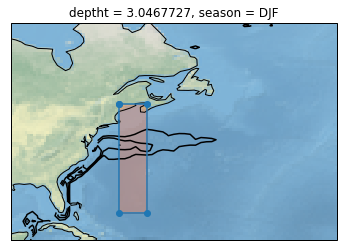

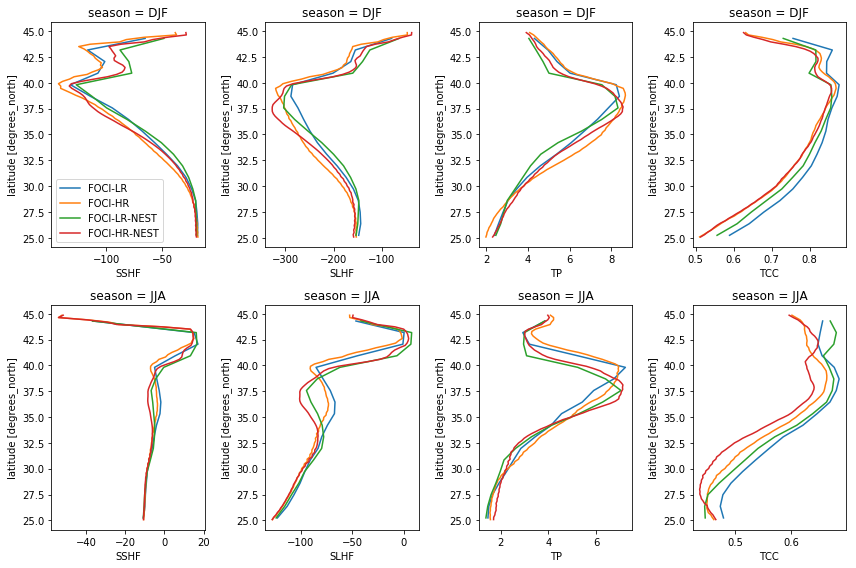

In [70]:
# Focus over Gulf Stream
lonmin = 290 #290
lonmax = 295 #292
latmin = 45
latmax = 25

# Draw box on map
x, y = [lonmin, lonmin, lonmax, lonmax, lonmin], [latmin, latmax, latmax, latmin, latmin]
fig_ref = plt.figure()
ax_ref = fig_ref.add_subplot(111, projection=ccrs.PlateCarree())
ax_ref.stock_img()
ax_ref.coastlines()
ax_ref.plot(x, y, marker='o', transform=ccrs.PlateCarree())
ax_ref.fill(x, y, transform=ccrs.PlateCarree(), color='coral', alpha=0.4)
ax_ref.set_extent([-90,-30,20,60],crs=ccrs.PlateCarree())
mke_foci_hr_nest.isel(deptht=0).sel(season='DJF').plot.contour(ax=ax_ref,levels=np.linspace(0.1,0.3,3),colors='k')
fig_ref.savefig('map_gulfstream_fluxes.png',format='png')

# Plot zonal means over the Gulf Stream
fig, axes = plt.subplots(2,4,figsize=(12,8))
axs = axes.flat

season = 'DJF'
sshf_foci_lr.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[0],label='FOCI-LR')
sshf_foci_hr.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[0],label='FOCI-HR')
sshf_foci_lr_nest.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[0],label='FOCI-LR-NEST')
sshf_foci_hr_nest.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[0],label='FOCI-HR-NEST')
axs[0].legend()

slhf_foci_lr.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[1])
slhf_foci_hr.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[1])
slhf_foci_lr_nest.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[1])
slhf_foci_hr_nest.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[1])

tp_foci_lr.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[2])
tp_foci_hr.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[2])
tp_foci_lr_nest.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[2])
tp_foci_hr_nest.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[2])

tcc_foci_lr.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[3])
tcc_foci_hr.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[3])
tcc_foci_lr_nest.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[3])
tcc_foci_hr_nest.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[3])

season = 'JJA'
sshf_foci_lr.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[4],label='FOCI-LR')
sshf_foci_hr.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[4],label='FOCI-HR')
sshf_foci_lr_nest.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[4],label='FOCI-LR-NEST')
sshf_foci_hr_nest.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[4],label='FOCI-HR-NEST')

slhf_foci_lr.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[5])
slhf_foci_hr.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[5])
slhf_foci_lr_nest.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[5])
slhf_foci_hr_nest.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[5])

tp_foci_lr.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[6])
tp_foci_hr.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[6])
tp_foci_lr_nest.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[6])
tp_foci_hr_nest.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[6])

tcc_foci_lr.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[7])
tcc_foci_hr.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[7])
tcc_foci_lr_nest.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[7])
tcc_foci_hr_nest.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax), season=season).mean('lon').plot(y='lat',ax=axs[7])

fig.tight_layout()
fig.savefig('heat_fluxes_precip_mean_gulfstream.png',format='png')

## Meridional heat fluxes at 850 hPa

Calculated using CDO. Take V,T at 850 hPa, highpass filter for 10 days, regrid to 1 deg grid, then seasonal means of V*T.

In [3]:
# FOCI-LR
foci_lr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK001_pmpi_19500101_19791231_VT_highpass_10day_r360x180_yseasmean.nc'
ds_foci_lr = xr.open_dataset(foci_lr)
vt_foci_lr = ds_foci_lr['VT'].groupby('time.season').mean('time') 

# FOCI-LR-NEST
foci_lr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK002_29_19500101_19791231_VT_highpass_10day_r360x180_yseasmean.nc'
ds_foci_lr_nest = xr.open_dataset(foci_lr_nest)
vt_foci_lr_nest = ds_foci_lr_nest['VT'].groupby('time.season').mean('time') 

# FOCI-HR-NEST
foci_hr_nest = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK005_6_19500101_19791231_VT_highpass_10day_850hPa_r360x180_yseasmean.nc'
ds_foci_hr_nest = xr.open_dataset(foci_hr_nest)
vt_foci_hr_nest = ds_foci_hr_nest['VT'].groupby('time.season').mean('time') 

# FOCI-HR
foci_hr = '/sfs/fs1/work-geomar/smomw352/foci_analysis/foci_JJK006_3_19500101_19791231_VT_highpass_10day_850hPa_r360x180_yseasmean.nc'
ds_foci_hr = xr.open_dataset(foci_hr)
vt_foci_hr = ds_foci_hr['VT'].groupby('time.season').mean('time') 

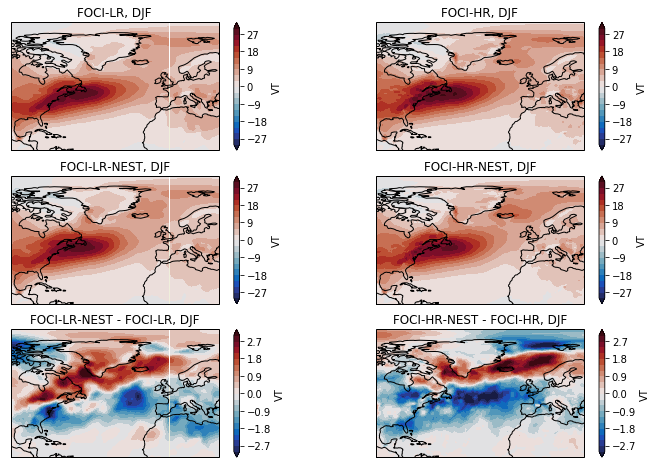

In [20]:
vtlevels = np.linspace(-30,30,21)
vtlevels2 = np.linspace(-3,3,21)
vtcmap = cmocean.cm.balance
prj = ccrs.PlateCarree()

fig = plt.figure(figsize=(12,8))
axs = []
for i in range(1,7):
    axs.append( fig.add_subplot(3,2,i,projection=prj) )

season = 'DJF'
vt_foci_lr.sel(season=season,plev=85000).plot.contourf(ax=axs[0],extend='both',levels=vtlevels,cmap=vtcmap)
vt_foci_hr.sel(season=season,plev=85000).plot.contourf(ax=axs[1],extend='both',levels=vtlevels,cmap=vtcmap)
vt_foci_lr_nest.sel(season=season,plev=85000).plot.contourf(ax=axs[2],extend='both',levels=vtlevels,cmap=vtcmap)
vt_foci_hr_nest.sel(season=season,plev=85000).plot.contourf(ax=axs[3],extend='both',levels=vtlevels,cmap=vtcmap)
axs[0].set_title('FOCI-LR, %s' % (season,))
axs[1].set_title('FOCI-HR, %s' % (season,))
axs[2].set_title('FOCI-LR-NEST, %s' % (season,))
axs[3].set_title('FOCI-HR-NEST, %s' % (season,))

(vt_foci_lr_nest - vt_foci_lr).sel(season=season,plev=85000).plot.contourf(ax=axs[4],extend='both',levels=vtlevels2,cmap=vtcmap)
(vt_foci_hr_nest - vt_foci_hr).sel(season=season,plev=85000).plot.contourf(ax=axs[5],extend='both',levels=vtlevels2,cmap=vtcmap)
axs[4].set_title('FOCI-LR-NEST - FOCI-LR, %s' % (season,))
axs[5].set_title('FOCI-HR-NEST - FOCI-HR, %s' % (season,))

for ax in axs:
    ax.coastlines()
    #ax.set_extent([-90,-30,20,60],crs=prj)
    ax.set_extent([-100,30,10,90],crs=prj)
    ax.add_feature(cartopy.feature.LAND)

fig.savefig('vt_10day_850hPa_mean.png',format='png',dpi=300)